In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.special import comb
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

ModuleNotFoundError: No module named 'pymc3'

exclusivity:   
let Apobec H/notH = H/L  = 19/99

hrd H/notH    = H/L  = 15/103
    
the question to ask is: what is the probability of seeing 0 H/H combination if you toss the two coins 118 time?

### priors

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


starting sampling


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p1]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:10<00:00, 3886.58draws/s]


<Figure size 504x504 with 0 Axes>

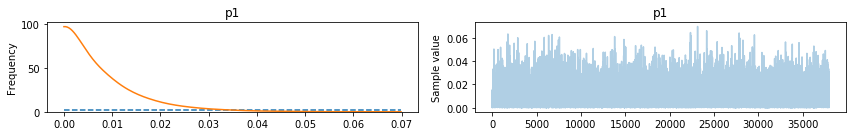

In [3]:
n = 118
heads = 0

with pm.Model() as model:
    p1 = pm.Uniform('p1', lower=0, upper=0.5) # non-informative prior
    y1 = pm.Binomial('y1', n=n, p=p1, observed=heads)
    print('starting sampling')
    trace = pm.sample(10000)

plt.figure(figsize=(7, 7))
pm.traceplot(trace[500:], 
          combined=True, 
          priors=[pm.Uniform.dist(0,0.5)])


plt.tight_layout();

In [4]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p1,0.008341,0.008178,0.000063,4.061970e-07,0.024938,17614.629059,1.000179


### model the exclusivity as bernoulli events. 

In [39]:
a = 19/118
b = 15/118
p = a * b
p

0.020468256248204537

In [41]:
y = pm.Binomial.dist(n=118, p=p)
y.random(size=10000)
logp = y.logp(0).eval()
np.exp(logp)
y.random(size=100)

array([3, 1, 2, ..., 2, 3, 4])

0.087133416452866

array([4, 5, 1, 2, 1, 1, 2, 3, 1, 2, 2, 3, 2, 2, 3, 1, 2, 2, 4, 4, 2, 4,
       2, 5, 2, 2, 0, 1, 2, 4, 1, 0, 3, 1, 3, 1, 0, 3, 2, 6, 1, 4, 1, 3,
       2, 3, 3, 1, 2, 2, 2, 5, 0, 3, 1, 1, 6, 5, 2, 6, 5, 2, 5, 4, 1, 0,
       1, 4, 3, 1, 1, 2, 2, 1, 4, 2, 3, 3, 0, 3, 1, 1, 4, 4, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 5, 4, 3, 2, 2, 3, 3])

In [43]:
n = 118
k = 0
p1 =a * b
comb(n, k, exact=True)*p1**k * (1-p1)**(n-k)

0.08713341645286601

### example binomial probability mass function:

$f(x|n,p)  = \binom{n}{k} p^x  (1-p)^{n-x} = \frac{n!}{k!(n-k)!} p^x  (1-p)^{n-x}$


In [48]:
n = 118
p1 = 19/118.0
pmfs = []
for i in range(118):
    k = i
    p = comb(n, k, exact=True)*p1**k * (1-p1)**(n-k)
    pmfs.append(p)

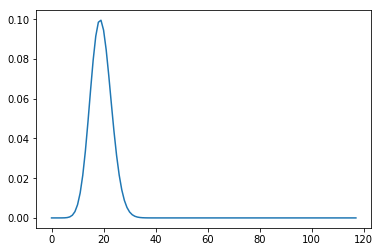

In [49]:
plt.plot(range(118), pmfs)

### the other way to look at this

In [34]:
# apobec 
p1 = 19/118.0
p1
y1 = pm.Bernoulli.dist(p=p1)
y1.random(size=100)


0.16101694915254236

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [35]:
p2 = 15/118.0
p2
y2 = pm.Bernoulli.dist(p=p2)
y2.random(size=100)

0.1271186440677966

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [15]:
# simulate for 10000 times
trials = []
for i in range(10000):
    s1 = y1.random(size=118)
    s2 = y2.random(size=118)
    num_success = (s1 + s2 == 2).sum()
    trials.append(num_success)

(array([2699., 2617., 2172., 1380.,  707.,  296.,   94.,   16.,   11.,
           8.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

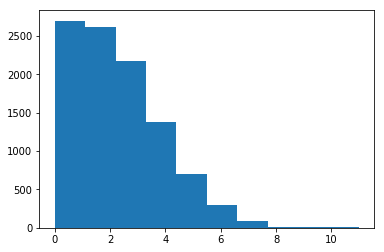

In [36]:
plt.hist(trials)

In [38]:
(np.array(trials) == 0).mean()

0.0755

model this as multinomial 

In [61]:
p1 = 20/118.0
p2 = 98/118.0
p3 = 15/118.0
p4 = 103/118.0
HH = p1 * p3
HL = p1 * p4 + p2 * p3
LL = p2 * p4
HH
HL
LL
y = pm.Multinomial.dist(n=118, p=[HH, HL, LL])
y.random(size=(4,))
# logp = y.logp(1).eval()
# np.exp(logp)
# y.random(size=100)

0.021545532892846882

0.25351910370583164

0.7249353634013215

TypeError: Attempted to generate values with incompatible shapes:
            size: (4,)
            size_tup: (4,)
            broadcast_shape[:len(size_tup)] == size_tup: False
            dist_shape: ()
            broadcast_shape: (3,)
        

### hypergeometric test

Suppose we have a collection of 20 animals, of which 7 are dogs. Then if we want to know the probability of finding a given number of dogs if we choose at random 12 of the 20 animals, we can initialize a frozen distribution and plot the probability mass function:

In [8]:
st.hypergeom(118, 15, 19).pmf(0)
st.hypergeom.cdf(0, 118, 15, 19)

0.05952733880988468

0.05952733880988468

Text(0.5,0,'# of hrds in our group of chosen patientss')

Text(0,0.5,'hypergeom PMF')

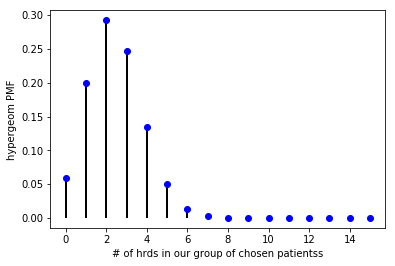

In [70]:
[M, n, N] = [118, 15, 19]
M = 118 # total
n = 15 # type 1 object, high hrd
N = 19 # randomly draw N samples without replacement
# what is the probability that we see 0 high hrd samples
# 118 patients, 15 high hrd, 19 high apobec, if i draw 19 samples without replacement, what are the probabilities we see 0, 1, .. 15 high hrd
rv = st.hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_hrds = rv.pmf(x)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_hrds, 'bo')
ax.vlines(x, 0, pmf_hrds, lw=2)
ax.set_xlabel('# of hrds in our group of chosen patientss')
ax.set_ylabel('hypergeom PMF')
plt.show()

### fisher exact test

In [6]:
ddsratio, pvalue = st.fisher_exact([[0, 15], [19, 84]])
pvalue
ddsratio

0.1253150263559656

0.0

In [12]:
st.hypergeom.cdf(21, 118, 41, 73)
st.hypergeom.cdf(20, 118, 41, 45)
st.hypergeom.cdf(21, 118, 73, 41)
st.fisher_exact([[20, 25], [21, 52]])

0.0625150729988202

0.9731339251391149

0.06251507299881982

(1.980952380952381, 0.11117456295857772)